In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# lattice points
A = 4
h = 0.001
N = 30
R = 2

x = np.linspace(-A, A, N)
y = x.copy()
X, Y = np.meshgrid(x, y)

cilinder_tape = np.sqrt(X**2+Y**2)
ext = cilinder_tape > R


In [3]:
def flux_potential(x, y):
    V = 2
    return V * x * (1 - R**2 / (x**2 + y**2))


def central_partial_derivative_x(f, x, h):
    return (f(x + h, y) - f(x - h, y)) / (2 * h)


def central_partial_derivative_y(f, y, h):
    return (f(x, y + h) - f(x, y - h)) / (2 * h)


In [4]:
v_x = central_partial_derivative_x(flux_potential, x, h)
v_y = -central_partial_derivative_y(flux_potential, y, h)

V_x, V_y = np.meshgrid(v_x, v_y)


[Text(0.5, 0, 'x [cm]'), Text(0, 0.5, 'y [cm]')]

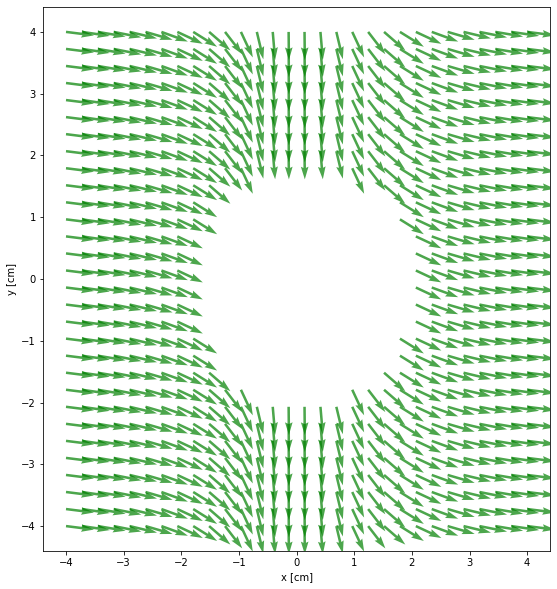

In [5]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 2, 1)
for i in range(N):
    for j in range(N):
        if ext[i, j]:
            ax.quiver(x[i], y[j], V_x[i, j], V_y[i, j],
                      color='g', alpha=0.7, width=0.005)

ax.set(xlabel='x [cm]', ylabel='y [cm]')